In [452]:
from sklearn.datasets import load_breast_cancer

In [453]:
breast_cancer=load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# dataset info

In [454]:
# information of first person
breast_cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [455]:
breast_cancer.data.shape

(569, 30)

# preprocessing

In [456]:
from sklearn.model_selection import train_test_split

trainX,testX,trainY,testY=train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2)

In [457]:
print(f'features => train_data : {trainX.shape} - test_data : {testX.shape}')
print(f'labels => train_data : {trainY.shape} - test_data : {testY.shape}')

features => train_data : (455, 30) - test_data : (114, 30)
labels => train_data : (455,) - test_data : (114,)


# Normalize

In [458]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

trainX=scaler.fit_transform(trainX)
testX=scaler.transform(testX)

# classification algorithms

## naive bayes

In [459]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def metrics_calculator(trainY,testY,predict_trainY,predict_testY):
    train_acc=accuracy_score(trainY,predict_trainY)
    test_acc=accuracy_score(testY,predict_testY)

    train_p=precision_score(trainY,predict_trainY)
    test_p=precision_score(testY,predict_testY)

    train_r=recall_score(trainY,predict_trainY)
    test_r=recall_score(testY,predict_testY)

    print(f"accuracy_score => train: {train_acc} test: {test_acc}\nprecision_score => train: {train_p} test: {test_p}\nrecall score => train: {train_r} test: {test_r}")
    return train_acc,train_p,train_r


In [460]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(trainX,trainY)

predict_trainY=gnb.predict(trainX)
predict_testY=gnb.predict(testX)

acc_train_gnb,p_train_gnb,r_train_gnb=metrics_calculator(trainY,testY,predict_trainY,predict_testY)


accuracy_score => train: 0.9428571428571428 test: 0.8771929824561403
precision_score => train: 0.9415807560137457 test: 0.9411764705882353
recall score => train: 0.9681978798586572 test: 0.8648648648648649


## KNN

In [461]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=11,algorithm='ball_tree',leaf_size=35)

knn.fit(trainX,trainY)

predict_trainY=knn.predict(trainX)
predict_testY=knn.predict(testX)

acc_train_knn,p_train_knn,r_train_knn=metrics_calculator(trainY,testY,predict_trainY,predict_testY)


accuracy_score => train: 0.9692307692307692 test: 0.956140350877193
precision_score => train: 0.9559322033898305 test: 0.948051948051948
recall score => train: 0.9964664310954063 test: 0.9864864864864865


## Decision Tree

In [462]:
from sklearn.tree import DecisionTreeClassifier

dTree=DecisionTreeClassifier(max_depth=110,min_samples_leaf=4,criterion='entropy')

dTree.fit(trainX,trainY)

predict_trainY=dTree.predict(trainX)
predict_testY=dTree.predict(testX)

acc_train_dTree,p_train_dTree,r_train_dTree=metrics_calculator(trainY,testY,predict_trainY,predict_testY)

accuracy_score => train: 0.9824175824175824 test: 0.9210526315789473
precision_score => train: 0.992831541218638 test: 0.9452054794520548
recall score => train: 0.9787985865724381 test: 0.9324324324324325


## Random Forest

In [463]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_depth=40,n_estimators=1000,min_samples_split=4)

rf.fit(trainX,trainY)

predict_trainY=rf.predict(trainX)
predict_testY=rf.predict(testX)

acc_train_rf,p_train_rf,r_train_rf=metrics_calculator(trainY,testY,predict_trainY,predict_testY)


accuracy_score => train: 0.9978021978021978 test: 0.9736842105263158
precision_score => train: 0.9964788732394366 test: 0.9863013698630136
recall score => train: 1.0 test: 0.972972972972973


## SVM

In [464]:
from sklearn.svm import SVC

svm_model=SVC(kernel='poly')

svm_model.fit(trainX,trainY)

SVC(kernel='poly')

In [465]:


predict_trainY=svm_model.predict(trainX)
predict_testY=svm_model.predict(testX)

acc_train_svm,p_train_svm,r_train_svm=metrics_calculator(trainY,testY,predict_trainY,predict_testY)


accuracy_score => train: 0.9846153846153847 test: 0.956140350877193
precision_score => train: 0.9758620689655172 test: 0.9726027397260274
recall score => train: 1.0 test: 0.9594594594594594


## logistic regression

In [466]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(trainX,trainY)

LogisticRegression()

In [467]:
predict_trainY=LR.predict(trainX)
predict_testY=LR.predict(testX)

acc_train_LR,p_train_LR,r_train_LR=metrics_calculator(trainY,testY,predict_trainY,predict_testY)

accuracy_score => train: 0.9714285714285714 test: 0.9385964912280702
precision_score => train: 0.956081081081081 test: 0.9466666666666667
recall score => train: 1.0 test: 0.9594594594594594


## ANN

In [468]:
from sklearn.neural_network import MLPClassifier

ann=MLPClassifier(hidden_layer_sizes=256,activation='relu',solver='adam',batch_size=64)
ann.fit(trainX,trainY)

c:\Users\pasargad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [469]:
predict_trainY=ann.predict(trainX)
predict_testY=ann.predict(testX)

acc_train_ann,p_train_ann,r_train_ann=metrics_calculator(trainY,testY,predict_trainY,predict_testY)

accuracy_score => train: 0.9846153846153847 test: 0.9912280701754386
precision_score => train: 0.9791666666666666 test: 1.0
recall score => train: 0.9964664310954063 test: 0.9864864864864865


## Compare train metrics

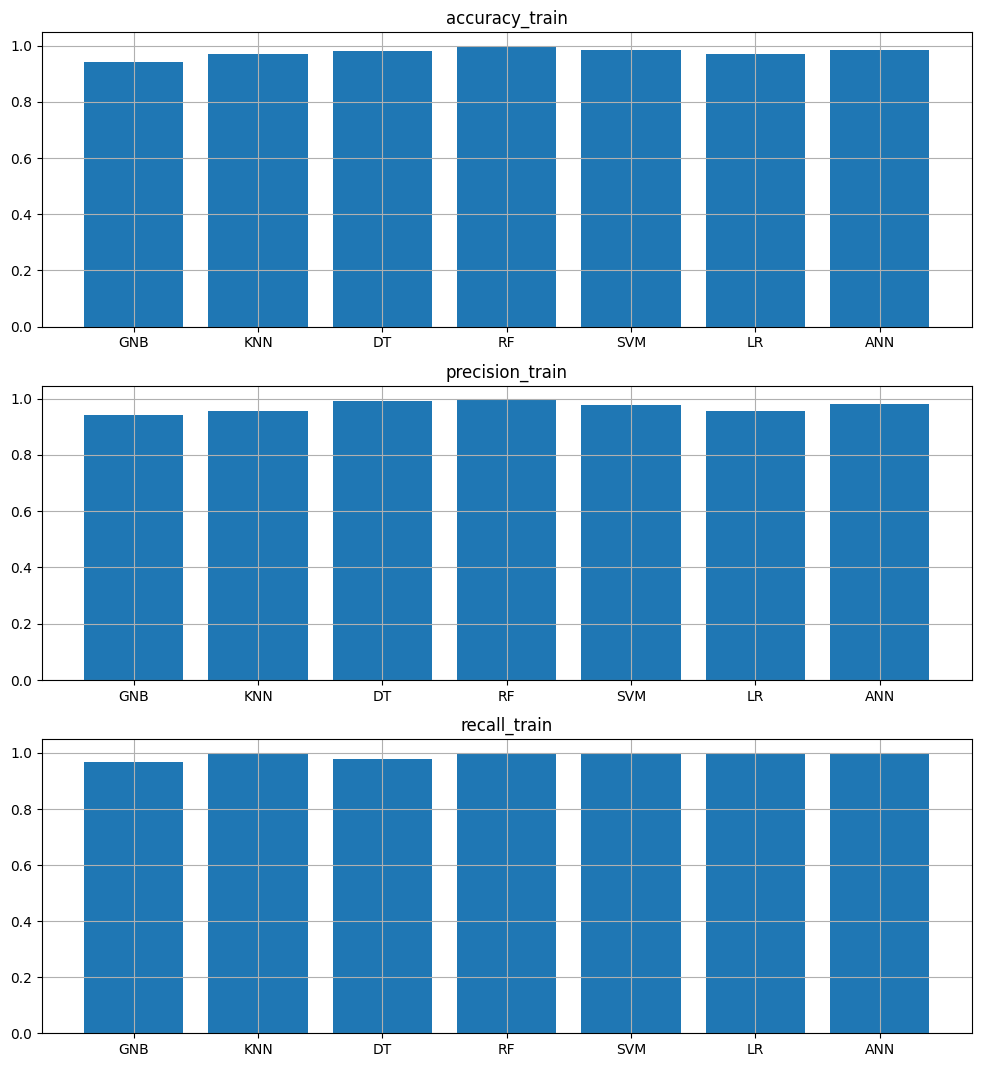

In [470]:
import matplotlib.pyplot as plt

acc_train=[acc_train_gnb,acc_train_knn,acc_train_dTree,acc_train_rf,acc_train_svm,acc_train_LR,acc_train_ann]

precision_train=[p_train_gnb,p_train_knn,p_train_dTree,p_train_rf,p_train_svm,p_train_LR,p_train_ann]

recall_train=[r_train_gnb,r_train_knn,r_train_dTree,r_train_rf,r_train_svm,r_train_LR,r_train_ann]

title=["GNB","KNN","DT","RF","SVM","LR","ANN"]

fig, axs = plt.subplots(3, 1, figsize=(12, 13))

axs[0].bar(title, acc_train)
axs[0].set_title('accuracy_train')
axs[0].grid()


axs[1].bar(title, precision_train)
axs[1].set_title('precision_train')
axs[1].grid()

axs[2].bar(title, recall_train)
axs[2].set_title('recall_train')
axs[2].grid()




